<a href="https://colab.research.google.com/github/aydawudu/NLP/blob/main/NLP(Multiple_Layer_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer LSTM

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.7.0


In [4]:
dataset, info=tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset=dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteSLC0VJ/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteSLC0VJ/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteSLC0VJ/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
tokenizer=info.features['text'].encoder

In [6]:
buffer_size=10000
batch_size=64

train_dataset=train_dataset.shuffle(buffer_size)
train_dataset=train_dataset.padded_batch(batch_size, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset=test_dataset.padded_batch(batch_size, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-trai

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS=10
history=model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 322s 796ms/step - loss: 0.6613 - accuracy: 0.5935 - val_loss: 0.6171 - val_accuracy: 0.6734
Epoch 2/10
391/391 [==============================] - 303s 773ms/step - loss: 0.4961 - accuracy: 0.7710 - val_loss: 0.5576 - val_accuracy: 0.7237
Epoch 3/10
391/391 [==============================] - 302s 772ms/step - loss: 0.4605 - accuracy: 0.7877 - val_loss: 0.5596 - val_accuracy: 0.7284
Epoch 4/10
391/391 [==============================] - 303s 774ms/step - loss: 0.4514 - accuracy: 0.8058 - val_loss: 0.5336 - val_accuracy: 0.7834
Epoch 5/10
391/391 [==============================] - 305s 777ms/step - loss: 0.3643 - accuracy: 0.8513 - val_loss: 0.3909 - val_accuracy: 0.8304
Epoch 6/10
391/391 [==============================] - 300s 766ms/step - loss: 0.4881 - accuracy: 0.7832 - val_loss: 0.6138 - val_accuracy: 0.6841
Epoch 7/10
391/391 [==============================] - 299s 763ms/step - loss: 0.4628 - accuracy: 0.7894 - val_loss: 0.4467 -

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

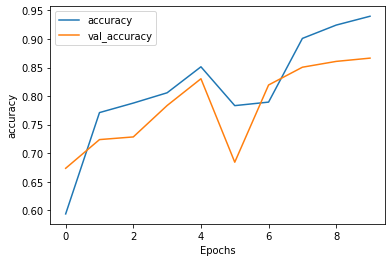

In [12]:
plot_graphs(history, 'accuracy')


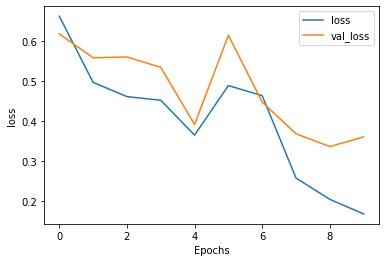

In [13]:
plot_graphs(history, 'loss')